In [30]:
# Importar librerias para descargar, descomprimir y asignar varibles del dataset
import gdown
import zipfile
from pathlib import Path
import os

# Importar librerias para manipulacion y visualizacion de imagenes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

# Importar librerias para visualizar rendimiento, carga de dataset
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

# Descarga y carga del dataset

In [ ]:
gdown.download('https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ')

with zipfile.ZipFile('TP1-3-natural-scenes.zip', 'r') as zip_ref:
    zip_ref.extractall('./TP1-3')

In [16]:
def load_dataset_test(directory):
    class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
    X_data = []
    y_data = []

    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        if not os.path.exists(class_dir):
            print(f"Directory {class_dir} does not exist.")
            continue

        for filename in os.listdir(class_dir):
            file_path = os.path.join(class_dir, filename)
            if os.path.isfile(file_path) and (file_path.endswith(".jpg") or file_path.endswith(".png")):
                try:
                    image = cv2.imread(file_path)
                    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                    image_resized = cv2.resize(image_rgb, (150, 150))  # Resize to a standard size if needed
                    X_data.append(image_resized)
                    y_data.append(class_name)
                except Exception as e:
                    print(f"Error loading image {file_path}: {e}")

    return np.array(X_data), np.array(y_data)

def preprocess_data(y_data, num_classes):
    # Codificación de etiquetas
    label_encoder = LabelEncoder()
    y_data_encoded = label_encoder.fit_transform(y_data)
    y_data_categorical = to_categorical(y_data_encoded, num_classes)
    
    return y_data_categorical


In [2]:
# Cargar y procesar el conjunto de validación
X_val_test, y_val_test = load_dataset_test(os.path.join('TP1-3/seg_test/seg_test'))

In [9]:
y_val_test = preprocess_data(y_val_test, 6)

In [14]:
print(len(X_val_test) ,len(y_val_test), X_val_test[0].shape, y_val_test)

3000 3000 (150, 150, 3) [[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


# Cargar el modelo a utilizar

In [31]:
# Ruta del archivo del modelo
model_path = './models/modelCNN.keras'

# Cargar el modelo
model = tf.keras.models.load_model(model_path)

# Verifica que el modelo se ha cargado correctamente
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │       409,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │           906 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,028,298 (23.00 MB)

 Trainable params: 2,009,432 (7.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,018,866 (15.33 MB)

## Funcion para probar el modelo

In [28]:
# Función para evaluar y graficar resultados de un modelo
def evaluate_model(model, X_val_test, y_val_test):

    # Generar predicciones
    predictions = model.predict(X_val_test)
    y_pred = np.argmax(predictions, axis=1)

    # Obtener etiquetas verdaderas (y_val) del dataset de validación
    y_val = np.argmax(y_val_test, axis=1)

    # Reporte de clasificación
    class_report = classification_report(y_val, y_pred)
    print("Classification Report:\n", class_report)

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_val, y_pred)

    # Graficar la matriz de confusión
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


# Evaluacion del modelo

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.90      0.76       437
           1       0.93      0.98      0.95       474
           2       0.85      0.74      0.79       553
           3       0.74      0.84      0.79       525
           4       0.80      0.84      0.82       510
           5       0.96      0.55      0.70       501

    accuracy                           0.80      3000
   macro avg       0.82      0.81      0.80      3000
weighted avg       0.82      0.80      0.80      3000



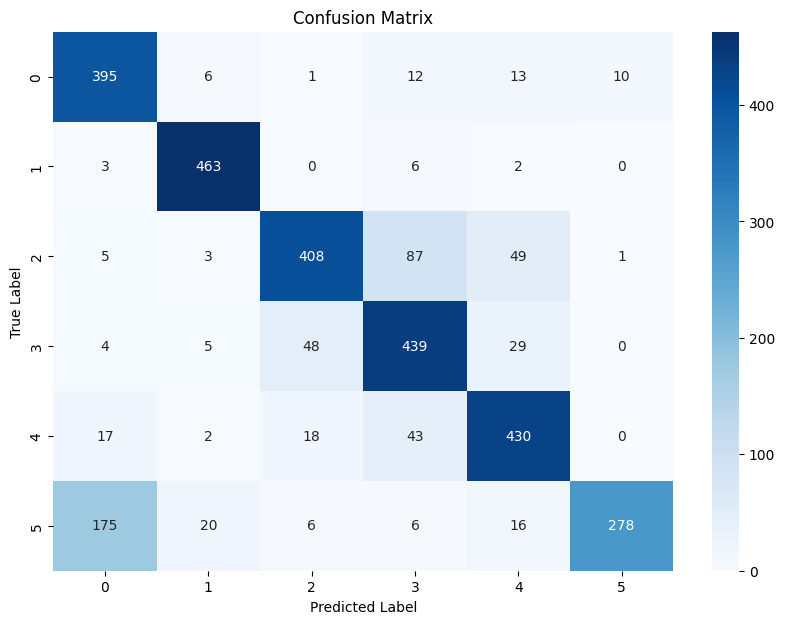

In [29]:
evaluate_model(model, X_val_test, y_val_test)